# LightGBM in Machine Learning


In [10]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


LightGBM is a gradient boosting classifier in machine learning that uses tree-based learning algorithms. It is designed to be distributed and efficient with faster drive speed and higher efficiency, lower memory usage and better accuracy.

What is LightGBM in Machine Learning?

In machine learning, the LightGBM classifier is part of the Boosting family, and today it is the most common classification model in the machine learning community. LightGBM is a powerful machine learning model that can be shaped depending on the task you are working on.

if you are working on the regression problem you have to use the LightGBM Regressor model, and if you are working on a classification problem you have to use the LightGBM Classifier model.


 I will present a tutorial on the LightGBM model on the classification problem. But in general, it supports the following applications:

1.classification

2.regression

3.binary classification

4.multi-classification

5.cross-entropy

LightGBM Tutorial

Importing the necessary Python libraries and the dataset:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

train_data = pd.read_csv("train.csv.zip")
test_data = pd.read_csv("test.csv.zip")

The dataset I’m using here is a classification dataset where the task is about to classify a creature. There are 3 classes in the target function, ghouls, goblins and ghosts. We will try to predict the class of the creature based on independent characteristics.

Now before moving forward let’s have a quick look at the training and test sets:

In [3]:
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


Data Preparation:

Let’s prepare the tarin_data for the LightGBM classifier. I will change the type of the categorical column from colour, and also change the target column, “type”, to full. The color column is nominal, so we’ll be using hot encoding, but in pandas, there is the “get_dummies” function which is very useful, easy to use, and does the same with hot encoding.


The Type column is also nominal, but being the target column we have to use Label Encoder. I will show you 2 approaches to converting categorical columns. One of them is LabelEncoder and the other is the map function. You can use whatever you want:

In [4]:
train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

train_data = train_data.set_index('id')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16964\2147053325.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.loc[:, "type"] = train_data.type.map(map_type)


The independent characteristics are designated by “X” and the dependent function is designated by “y”. 40% of train_data is allocated for the tests:

In [5]:
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

LightGBM Classifier

First of all, we need to define the parameters and intervals. The parameters must be defined in a dictionary. The LightGBM classification model will try all the intervals we have set and try to find the optimal settings to get the best score. You can add more parameters if you want, but remember, more parameters mean more time:

In [6]:
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

lgbm = LGBMClassifier() # Shortname the LGBMClassifier()
lgbm.fit(X_train, y_train) # Train the lgbm on train sets

LGBMClassifier()

A total of 3,240,000 adjustments were applied to the oar, the treatment lasted 8 hours 46 minutes. A very long time, and if you add more parameters the time will be longer:

In [7]:
lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=40, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train)

y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

0.738


Finally, let’s take a look at which features the model has given more importance:



<AxesSubplot: xlabel='importance', ylabel='features'>

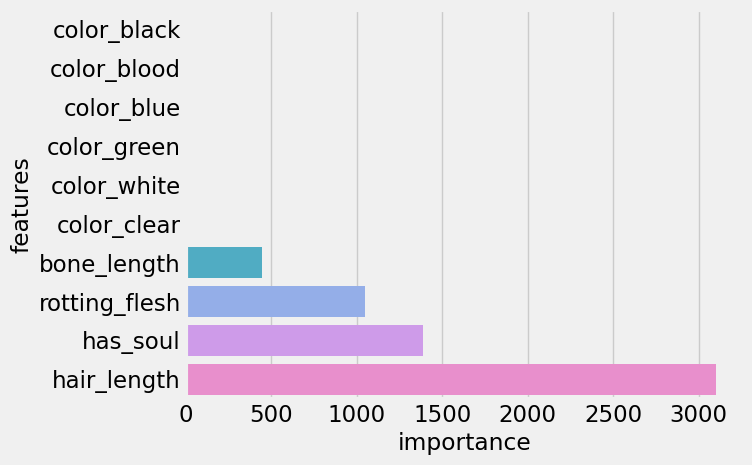

In [8]:

sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))

You can get all the Python code used on this tutorial on LightGBM Classifier in Machine Learning from below.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16964\422519519.py:33: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_data.loc[:, "type"] = train_data.type.map(map_type)


0.738


<AxesSubplot: xlabel='importance', ylabel='features'>

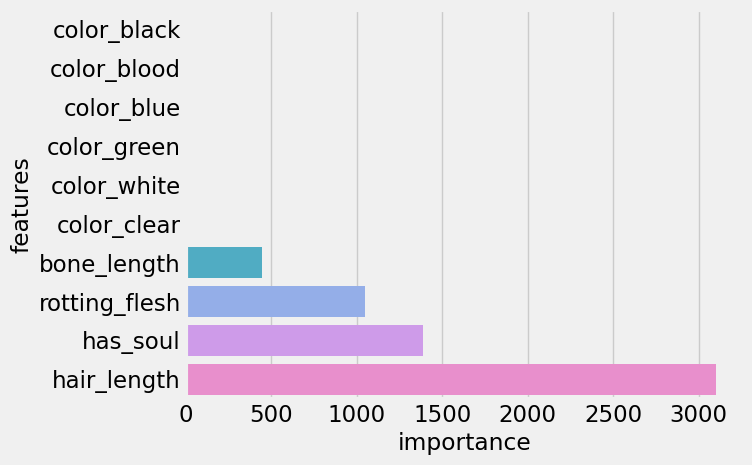

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

train_data = pd.read_csv("train.csv.zip")
test_data = pd.read_csv("test.csv.zip")

train_data.head()

train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

train_data = train_data.set_index('id')

X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

lgbm = LGBMClassifier() # Shortname the LGBMClassifier()
lgbm.fit(X_train, y_train) # Train the lgbm on train sets

lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=40, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train)

y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)


sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))